In [2]:
#@title Import relevant modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import random

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [4]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="/Users/benthomas/241/project 3/train.csv")


# Print the first rows of the pandas DataFrame.
training_df.head(10)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Price
0,811,78,1.0,6,6,1974,0.7,0.0,1.0,1.3,...,1,5,1,2,0.5,2.6,0.0,0.0,1,1.8
1,665,49,2.1,8,5,2005,1.7,0.4,2.1,2.1,...,1,8,1,3,1.1,1.9,2.7,0.0,1,4.2
2,303,118,1.4,7,5,2001,0.0,1.5,1.5,1.5,...,1,6,1,3,0.8,4.7,0.8,0.0,1,2.0
3,142,78,1.2,7,5,2005,1.3,0.4,1.7,1.7,...,1,7,0,2,0.7,1.6,0.2,0.0,1,2.6
4,1041,88,1.3,5,4,1957,0.2,0.3,1.1,1.8,...,1,8,1,2,0.5,0.0,0.0,0.0,1,1.6
5,412,100,3.5,5,5,1955,1.1,0.0,1.1,1.1,...,1,5,0,2,0.6,2.6,0.0,0.0,1,1.4
6,1405,60,1.0,3,4,1915,0.0,0.7,0.7,0.7,...,1,6,0,3,0.9,2.2,0.0,1.6,1,1.1
7,223,85,1.1,6,6,1975,0.6,0.2,0.7,0.8,...,1,6,1,2,0.4,2.1,2.1,0.0,2,1.8
8,603,80,1.0,8,5,1992,0.8,0.1,0.9,0.9,...,1,8,1,2,0.5,1.2,1.5,0.0,2,2.2
9,949,65,1.4,7,5,2002,0.0,0.9,0.9,0.9,...,1,7,1,2,0.5,1.4,1.0,0.0,2,1.9


In [5]:
#Question 2: 

# Get statistics on the dataset.
training_df.describe()




,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,Price
count,818.0,818.0,818.0,818.0,818.0,818.0,818.0,818.0,818.0,818.0,...,818.0,818.0,818.0,818.0,818.0,818.0,818.0,818.0,818.0,818.0
mean,729.4,70.2,1.0,6.2,5.6,1972.9,0.4,0.6,1.1,1.2,...,1.0,6.6,0.6,1.9,0.5,0.9,0.5,0.2,6.3,1.9
std,424.5,24.9,0.6,1.4,1.0,31.0,0.5,0.4,0.4,0.4,...,0.2,1.6,0.6,0.7,0.2,1.2,0.7,0.6,2.8,0.8
min,1.0,21.0,0.1,2.0,2.0,1880.0,0.0,0.0,0.0,0.4,...,1.0,3.0,0.0,1.0,0.2,0.0,0.0,0.0,1.0,0.4
25%,356.5,59.2,0.8,5.0,5.0,1954.0,0.0,0.3,0.8,0.9,...,1.0,5.0,0.0,1.0,0.4,0.0,0.0,0.0,4.0,1.3
50%,726.5,70.0,0.9,6.0,5.0,1975.0,0.4,0.5,1.0,1.1,...,1.0,6.0,1.0,2.0,0.5,0.0,0.3,0.0,6.0,1.7
75%,1103.8,80.0,1.1,7.0,6.0,2004.0,0.7,0.8,1.3,1.4,...,1.0,8.0,1.0,2.0,0.6,1.7,0.7,0.0,8.0,2.2
max,1460.0,313.0,7.1,10.0,9.0,2009.0,5.6,2.2,6.1,4.7,...,2.0,12.0,3.0,4.0,1.4,8.6,5.5,5.5,12.0,7.5


2. [7 points] Before you start, always remember to take a look at the data you are going to deal with. Analyse the training set and report the following metrics:

How many records are there in the training set: 818
What is the mean value of the price: 1.9
What is the minimal and maximal price: 0.4 , 7.5
What is the standard derivation of the price: 0.8

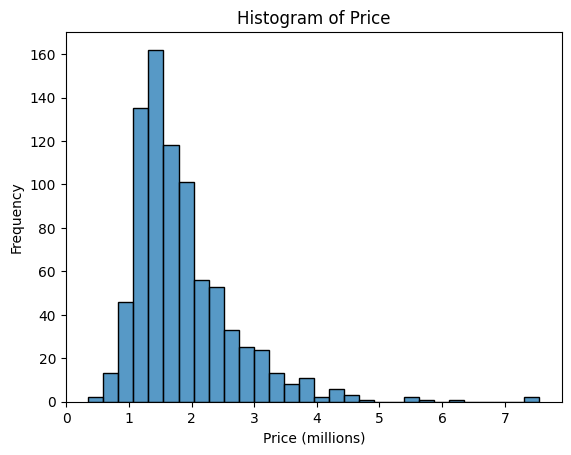

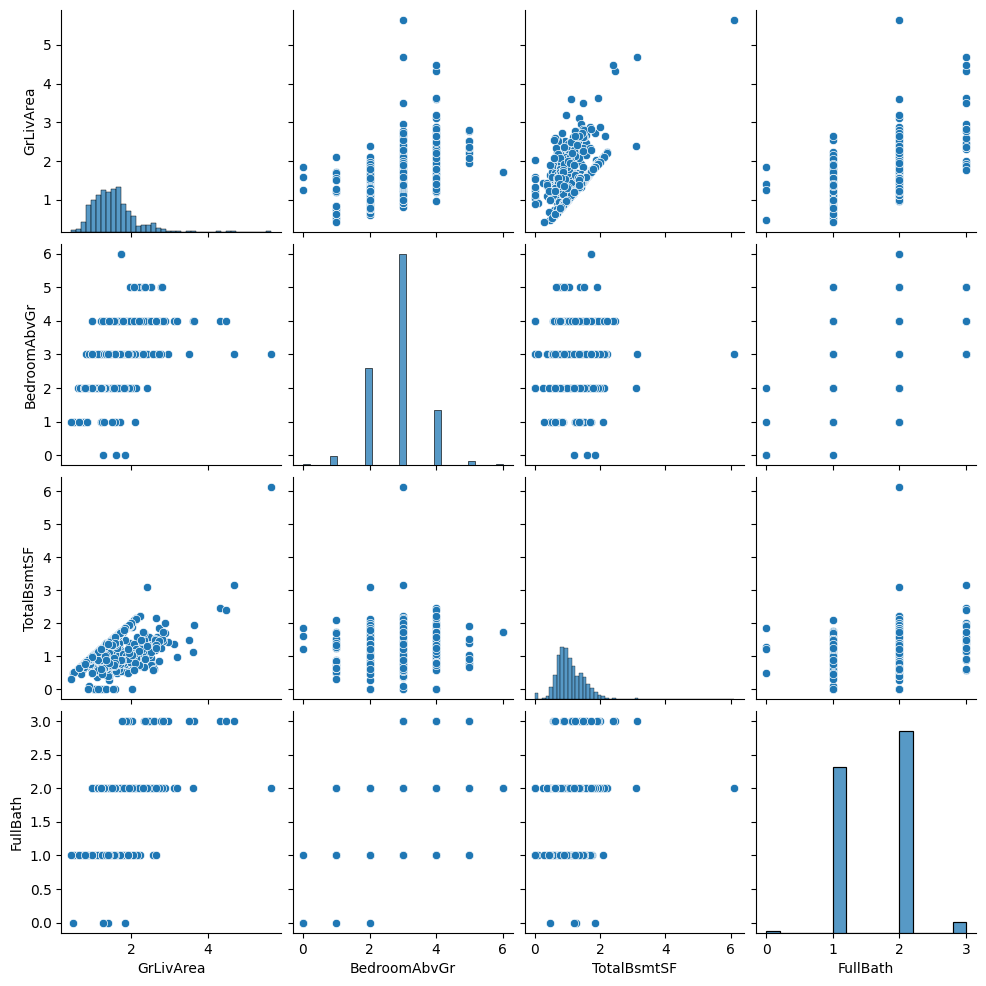

In [6]:
#Question 3. Histogram 
sns.histplot(training_df['Price'], bins=30)
plt.title('Histogram of Price')
plt.xlabel('Price (millions)')
plt.ylabel('Frequency')
plt.show()

#Question 4: Pair-wise scatter plot
cols = ['GrLivArea', 'BedroomAbvGr', 'TotalBsmtSF', 'FullBath'] 
#cols = ['population', 'households', 'median_house_value', 'median_income', 'latitude']
sns.pairplot(training_df[cols], height=2.5);
plt.show()

4. [7 points] Some features are correlated with each other. Report a pair-wise scatter plot of the following features and report what you found. Describe what you could do to accelerate the training process without compromising too much accuracy. (You do not have to implement what you proposed here in the following questions.)

- Identify and keep only the most relevant features. Removing irrelevant or redundant features can significantly speed up the training process. Also, If you use feature scaling you can use the correlation to reduce the number of features. 

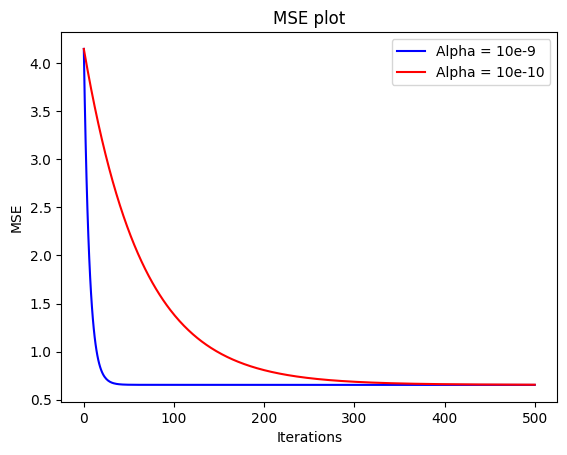

In [53]:
# Function for Prediction
def prediction(features,weights):
    
    pred = []
    
    #find dot product of weights and features transposed 
    pred = np.dot(weights,features.T)
    return pred

# Function for Mean Squared Error (MSE) Loss
def calculate_mse_loss(predictions, actual_prices):
    m = len(actual_prices)
    #equation used to calculate MSE
    mse_loss = np.sum((predictions - actual_prices)**2) / m
    return mse_loss

#Calculates gradient 
def calculate_gradient(features, predictions, actual_prices): 
    m = len(actual_prices)
    #calculates error
    ydif = predictions - actual_prices
    #Equation to calculate gradient 
    grad = 2 * np.dot(features.T, ydif.T) / m 
    return grad

def update_weights(weight, alpha, gradient):
    #recalculates items in weight array 
    Wt_plus_1 = weight - (alpha * gradient)
    return Wt_plus_1

#creates MSE learning curve plot for question 1 
def plot(mse,mse2):
    # Create a line plot
    plt.plot(mse,label='Alpha = 10e-9', color='blue')
    plt.plot(mse2,label='Alpha = 10e-10', color='red')

    # Add labels and title
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title('MSE plot')
    plt.legend()

    # Show the plot
    plt.show()  
    
#---------givens for Alpha = 10e-9-----------
features = training_df.iloc[:, 1:-1]

#creates array of weights
weights = [0]*25

alpha = 10e-9

iterations = 500

MSE_values_1 = []
iterations_array = []

#-------code-----------

for i in range(iterations+1):

    #5. Implement function pred that calculates the predicted value of the price based on the current weights and feature values. 
    prediction_array = prediction(features,weights)

    #6. calculates MSE: loss function
    mse = calculate_mse_loss(prediction_array, training_df['Price'].values)


    #7. Calculate gradient
    grad = calculate_gradient(features, prediction_array, training_df['Price'].values)

    #8. Update weight
    weights = update_weights(weights, alpha, grad)

    #append MSE_values and iterations to a list to be plotted
    MSE_values_1.append(mse)



#---------givens for Alpha = 10e-10-----------

#creates array of weights
weights = [0]*25

alpha = 10e-10

MSE_values_2 = []

#-------code-----------

for i in range(iterations+1):

    #5. Implement function pred that calculates the predicted value of the price based on the current weights and feature values. 
    prediction_array = prediction(features,weights)

    #6. calculates MSE: loss function
    mse = calculate_mse_loss(prediction_array, training_df['Price'].values)


    #7. Calculate gradient
    grad = calculate_gradient(features, prediction_array, training_df['Price'].values)

    #8. Update weight
    weights = update_weights(weights, alpha, grad)

    #append MSE_values and iterations to a list to be plotted
    MSE_values_2.append(mse)

plot(MSE_values_1, MSE_values_2)



10. [6 points] First set α to be 0.2. Does your algorithm finds the minimal MSE? If so, report the number of iterations your algorithm converges. If not, what’s happening and explain why that is the case.
- When the learning curve is 0.2 the MSE grows to infinity. If the learning rate is too high, the model might overshoot the minimum of the cost function. In other words, it takes steps that are too large and may fail to converge to the optimal solution. This can lead to oscillations or divergence.

12. [6 points] For the two α, which one converges faster? Describe why it is this case.
- The blue line converges faster. The reason is because a well-tuned learning rate can help the model converge faster. Too high a learning rate may cause overshooting, and too low a learning rate may result in slow convergence. 


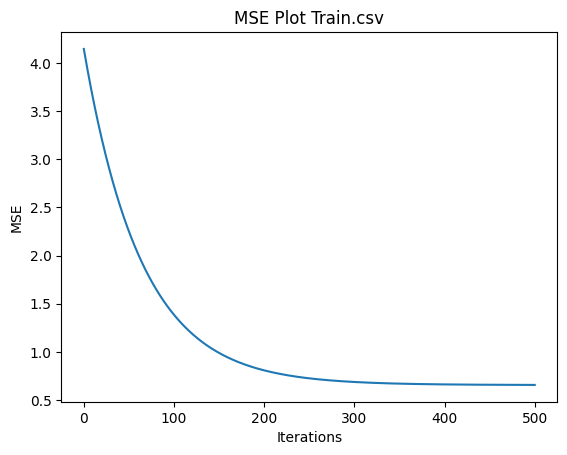

MSE Loss of training set:  0.6562627556364214


In [7]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="/Users/benthomas/241/project 3/train.csv")


# Function for Prediction
def prediction(features,weights):
    
    pred = []

    
        # Calculate the sum of values in the row
    pred = np.dot(weights,features.T)
    return pred

# Function for Mean Squared Error (MSE) Loss
def calculate_mse_loss(predictions, actual_prices):
    m = len(actual_prices)
    mse_loss = np.sum((predictions - actual_prices)**2) / m
    return mse_loss

def calculate_gradient(features, predictions, actual_prices): 
    m = len(actual_prices)
    ydif = predictions - actual_prices
    grad = 2 * np.dot(features.T, ydif.T) / m  
    return grad

def update_weights(weight, alpha, gradient):
    
    Wt_plus_1 = weight - (alpha * gradient)
    return Wt_plus_1

def plot(mse):
    # Create a line plot
    plt.plot(mse)

    # Add labels and title
    plt.xlabel('Iterations')
    plt.ylabel('MSE')
    plt.title('MSE Plot Train.csv')
    # Show the plot
    plt.show()  

    

    
#---------givens-----------
features = training_df.iloc[:, 1:-1]

#creates array of weights
weights = [0]*25

alpha = 10e-10

iterations = 500

MSE_values = []
iterations_array = []

#-------code-----------

for i in range(iterations+1):

    #5. Implement function pred that calculates the predicted value of the price based on the current weights and feature values. 
    prediction_array = prediction(features,weights)
   

    #6. calculates MSE: loss function
    mse = calculate_mse_loss(prediction_array, training_df['Price'].values)


    #7. Calculate gradient
    grad = calculate_gradient(features, prediction_array, training_df['Price'].values)
 

    #8. Update weight
    weights = update_weights(weights, alpha, grad)

    #append MSE_values and iterations to a list to be plotted
    MSE_values.append(mse)



plot(MSE_values)
print("MSE Loss of training set: ", MSE_values[-1])






In [13]:
#Question 13:

# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="/Users/benthomas/241/project 3/test.csv")



#-------code-----------

predictions = prediction(features, weights)

loss = calculate_mse_loss(predictions, training_df['Price'].values)

print("MSE Loss with weights from training set: ", loss)




MSE Loss with weights from training set:  0.6983060150853097


13. Predict the housing price for the test set (i.e., “test.csv”). Report the MSE for your model on the test set. In general, will your model achieves better MSE on the test set than the training set? Why?

- The MSE loss is only 0.6983060150853097 when the weights from the training set are used. This is slightly smaller than the training set but still incredibly effective. This is because very slight over-fitting.

